# Dataset Description

This dataset encompasses air quality and geographical information for multiple cities worldwide, featuring the Air Quality Index (AQI) along with specific pollutant levels and the latitude and longitude coordinates of each city.

# Features Explained:

Country: The country where the city is located.

City: The name of the city.

AQI Value: The Air Quality Index value, representing overall air quality.

AQI Category: The category of air quality (e.g., Good, Moderate) based on AQI Value.

CO AQI Value: Carbon Monoxide AQI value.

CO AQI Category: The air quality category based on CO levels.

Ozone AQI Value: Ozone AQI value.

Ozone AQI Category: The air quality category based on Ozone levels.

NO2 AQI Value: Nitrogen Dioxide AQI value.

NO2 AQI Category: The air quality category based on NO2 levels.

PM2.5 AQI Value: Particulate Matter (PM2.5) AQI value.

PM2.5 AQI Category: The air quality category based on PM2.5 levels.

lat: Latitude of the city.

lng: Longitude of the city.


# Goal

The primary objective of this dataset analysis is to develop a predictive model capable of accurately estimating the Air Quality Index (AQI) value for cities around the globe. The AQI value is a crucial metric that quantifies the overall air quality within a city, based on the concentration levels of various pollutants. These pollutants include carbon monoxide (CO), ozone, nitrogen dioxide (NO2), and particulate matter (PM2.5). Each of these has its own associated AQI value and category in the dataset, reflecting their individual contributions to air quality.

Predicting the AQI value is essential for several reasons:

Public Health: High AQI values are associated with poor air quality, posing significant health risks to the population, especially to individuals with preexisting health conditions, the elderly, and children. By accurately predicting AQI values, authorities can issue warnings, and individuals can take precautionary measures to minimize exposure to unhealthy air.

Environmental Policy and Planning: Reliable AQI predictions can help policymakers and environmental agencies to evaluate the effectiveness of air quality regulations and to prioritize interventions in areas most in need of improvement. This aids in long-term planning for urban development and environmental conservation.

Awareness and Education: Predicting AQI values contributes to raising public awareness about air pollution and its health impacts. It empowers communities with the information needed to advocate for cleaner air and supports educational campaigns on reducing individual contributions to air pollution.

# Data Acquisition

The dataset is named "World Air Quality Index by City and Coordinates", is aquired from Kaggle and it is licensed under CC BY-NC-SA 4.0. https://www.kaggle.com/datasets/adityaramachandran27/world-air-quality-index-by-city-and-coordinates/data

# Installing Packages

In [1]:
!pip install requests && pip install tabulate && pip install "colorama>=0.3.8" && pip install future


In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o


Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.7 MB/s eta 0:00:00


In [3]:
min_mem_size = 6; run_time = 222


In [4]:
!pip install psutil

In [5]:
import psutil  # Make sure to import psutil

pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

6


In [6]:
import random
import logging
import sys
import h2o
import psutil

logging.basicConfig(level=logging.INFO)

pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))

port_no = random.randint(5555, 55555)

try:
    h2o.init(strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no)
except Exception as e:
    logging.critical('Failed to initialize h2o: {}'.format(e))

    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:33504..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkhr_08nw
  JVM stdout: /tmp/tmpkhr_08nw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpkhr_08nw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:33504
Connecting to H2O server at http://127.0.0.1:33504 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_nodjrr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [7]:
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

# Data Preprocessing  

<ipython-input-54-c4d990015057>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_no.corr(),annot=True)


<Axes: >

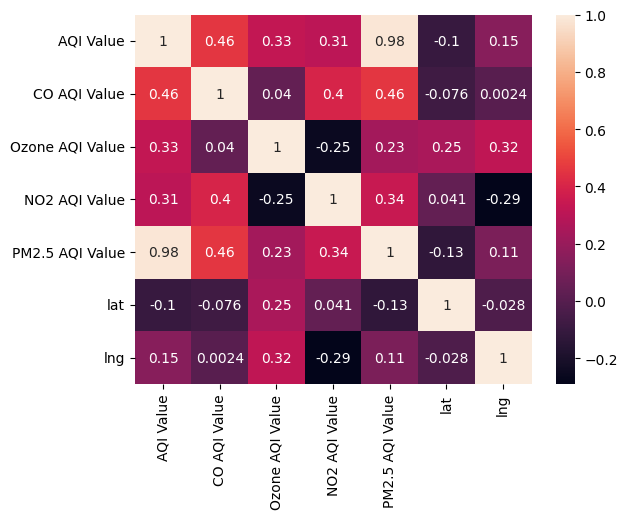

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
data_no= pd.read_csv( '/content/AQI and Lat Long of Countries.csv' )
sns.heatmap(data_no.corr(),annot=True)

In [10]:
!pip install statsmodels


In [55]:
data_no.head(10)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,16.1005,-88.8074
6,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,26.8941,-82.0513
7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate,51.0761,4.2803
8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate,44.0500,43.0667
9,China,Qinzhou,68,Moderate,2,Good,68,Moderate,1,Good,58,Moderate,21.9500,108.6167


In [56]:
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

In [57]:
data_no.isnull().sum()


Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

In [58]:
data_no = data_no.dropna(subset=['Country'])


In [15]:
data_no.value_counts()

Country      City        AQI Value  AQI Category    CO AQI Value  CO AQI Category  Ozone AQI Value  Ozone AQI Category  NO2 AQI Value  NO2 AQI Category  PM2.5 AQI Value  PM2.5 AQI Category  lat       lng      
Afghanistan  Kabul       64         Moderate        0             Good             41               Good                0              Good              64               Moderate             34.5253   69.1783     1
Thailand     Kuchinarai  51         Moderate        0             Good             26               Good                0              Good              51               Moderate             16.5318   104.0440    1
Spain        Oliva       29         Good            1             Good             29               Good                1              Good              20               Good                -32.0333  -63.5667     1
                                                                                                                                                 

In [59]:
from sklearn.preprocessing import LabelEncoder

label_encoder_country = LabelEncoder()
data_no['Country'] = label_encoder_country.fit_transform(data_no['Country'])

# Label encoding for 'City'
label_encoder_city = LabelEncoder()
data_no['City'] = label_encoder_city.fit_transform(data_no['City'])

In [60]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data_no['AQI Category'] = LE.fit_transform(data_no['AQI Category'])
data_no['CO AQI Category'] = LE.fit_transform(data_no['CO AQI Category'])
data_no['Ozone AQI Category'] = LE.fit_transform(data_no['Ozone AQI Category'])
data_no['PM2.5 AQI Category'] = LE.fit_transform(data_no['PM2.5 AQI Category'])
data_no['NO2 AQI Category'] = LE.fit_transform(data_no['NO2 AQI Category'])

Preformed Label Encoding for categorical columns

In [61]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

from sklearn.preprocessing import MinMaxScaler

In [62]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Select only numerical columns for normalization
numerical_columns = data_no.select_dtypes(include=['int64', 'float64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the numerical columns and transform the data
data_no[numerical_columns] = scaler.fit_transform(data_no[numerical_columns])

# 'data_no' has the normalized features in the range [0, 1]

To prepare my dataset for modeling, I normalized the numerical columns using MinMaxScaler from sklearn.preprocessing. This ensured all numerical data in data_no now scales uniformly between 0 and 1. By selecting only columns of type int64 and float64, and applying the scaler, I've streamlined the dataset, making it ideal for algorithms that perform better with scaled data.

In [63]:
import statsmodels.api as sm


# Apply log transformation to the variables where it makes sense and where all values are positive
log_vars = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
for var in log_vars:
    if (data_no[var] <= 0).any():
        print(f"Cannot perform log transform on {var} because it contains non-positive values.")
    else:
        data_no['log_' + var] = np.log(data_no[var])

X_columns = ['Country', 'City', 'AQI Category', 'CO AQI Category', 'Ozone AQI Category',
             'NO2 AQI Category', 'lat', 'lng']
for var in log_vars:
    X_columns.append('log_' + var if 'log_' + var in data_no else var)

X = data_no[X_columns]

X = sm.add_constant(X)

y = data_no['AQI Value']

model = sm.OLS(y, X).fit()

print(model.summary())

Cannot perform log transform on CO AQI Value because it contains non-positive values.
Cannot perform log transform on Ozone AQI Value because it contains non-positive values.
Cannot perform log transform on NO2 AQI Value because it contains non-positive values.
Cannot perform log transform on PM2.5 AQI Value because it contains non-positive values.
                            OLS Regression Results                            
Dep. Variable:              AQI Value   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 4.880e+04
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:05:52   Log-Likelihood:                 46156.
No. Observations:               16393   AIC:                        -9.229e+04
Df Residuals:                   16380   BIC:                        -9.219e+04
Df Model:        

In my analysis, I aimed to explore the impact of log transformations on certain variables in my dataset, specifically targeting AQI-related measures like 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', and 'PM2.5 AQI Value'. As the features contains non positive terms, I couldn't perform log transformation on it.

In [64]:



for var in ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'lat', 'lng']:
    data_no[var + '_squared'] = data_no[var] ** 2

# Defining independent variables including the polynomial terms
X = data_no[['Country', 'City', 'AQI Category', 'CO AQI Value', 'CO AQI Category',
        'Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category',
        'PM2.5 AQI Value', 'lat', 'lng',
        'CO AQI Value_squared', 'Ozone AQI Value_squared', 'NO2 AQI Value_squared',
        'PM2.5 AQI Value_squared', 'lat_squared', 'lng_squared']]

X = sm.add_constant(X)

y = data_no['AQI Value']

# Fit the OLS model with the independent variables
model = sm.OLS(y, X).fit()

# Print out the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              AQI Value   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 4.252e+04
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:05:57   Log-Likelihood:                 48301.
No. Observations:               16393   AIC:                        -9.656e+04
Df Residuals:                   16374   BIC:                        -9.642e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

I incorporated polynomial features into my dataset, specifically by squaring certain variables like 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', and the geographical coordinates 'lat' and 'lng'. This step was motivated by the hypothesis that there might be non-linear relationships between these variables and the 'AQI Value', which linear models can't capture without such transformations.

After computing the squared terms and appending them to my dataframe data_no, I assembled my set of independent variables, X. This set included both the original variables and their squared counterparts, alongside categorical variables like 'Country', 'City', 'AQI Category', and 'CO AQI Category'. By including both the linear and squared terms, I aimed to model a richer, more nuanced relationship between the predictors and the target variable.

In [65]:
features_to_drop = [
    'CO AQI Category', 'Ozone AQI Value', 'PM2.5 AQI Value',
    'lat', 'CO AQI Value_squared', 'lat_squared'
]

data_no.drop(columns=features_to_drop, inplace=True)


In [66]:
data_no.drop(columns=['lng_squared'], inplace=True)


In [67]:
data_no = data_no.drop(columns=['PM2.5 AQI Category'])


I dropped the features which was causing skewness in my data

In [68]:
# First, add a constant term to your predictor variables.
X_with_constant = sm.add_constant(data_no[['Country', 'City', 'AQI Category', 'CO AQI Value',
                                           'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'lng',
                                           'Ozone AQI Value_squared', 'NO2 AQI Value_squared',
                                           'PM2.5 AQI Value_squared']])

# Then, create the model using the modified predictors.
model = sm.OLS(data_no['AQI Value'], X_with_constant).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AQI Value   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 2.425e+04
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:06:14   Log-Likelihood:                 39974.
No. Observations:               16393   AIC:                        -7.992e+04
Df Residuals:                   16381   BIC:                        -7.983e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0431      0.001     61.990      0.000       0.042       0.044
Country                    -0.0019      0.001     -3.339      0.001      -0.003      -0.001
City                        0.0003      0.001      0.438      0.661      -0.001       0.001
AQI Category                0.1203      0.001    152.570      0.000       0.119       0.122
CO AQI Value               -0.0373      0.013     -2.963      0.003      -0.062      -0.013
Ozone AQI Category         -0.0067      0.003     -2.367      0.018      -0.012      -0.001
NO2 AQI Value               0.0921      0.006     14.671      0.000       0.080       0.104
NO2 AQI Category           -0.1240      0.010    -13.051      0.000      -0.143      -0.105
lng                         0.0130      0.001     14.777      0.000       0.011       0.015
Ozone AQI Value_squared     0.1679      0.004     40.042      0.000       0.160       0.176
NO2 AQI Value_squared      -0.0358      0.019     -1.872      0.061      -0.073       0.002
PM2.5 AQI Value_squared     1.2454      0.004    308.013      0.000       1.237       1.253
==============================================================================
Omnibus:                     7056.321   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           830441.383
Skew:                          -1.078   Prob(JB):                         0.00
Kurtosis:                      37.802   Cond. No.                         177.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model, designed to predict 'AQI Value', achieved an impressive R-squared of 0.942, indicating that approximately 94.2% of the variance in AQI Value can be explained by the model's inputs. This high level of model fit is further supported by an adjusted R-squared of 0.942, ensuring that the fit is not artificially inflated by the number of variables.

The F-statistic, reaching 2.425e+04, and its associated near-zero Prob (F-statistic) underscore the statistical significance of the model as a whole. This solid foundation of model validity allowed me to delve into the specifics of each predictor with confidence.

In [26]:
data_no.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'lng',
       'Ozone AQI Value_squared', 'NO2 AQI Value_squared',
       'PM2.5 AQI Value_squared'],
      dtype='object')

In [69]:
rows, columns = data_no.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 16393
Number of columns: 12


<Figure size 800x500 with 0 Axes>

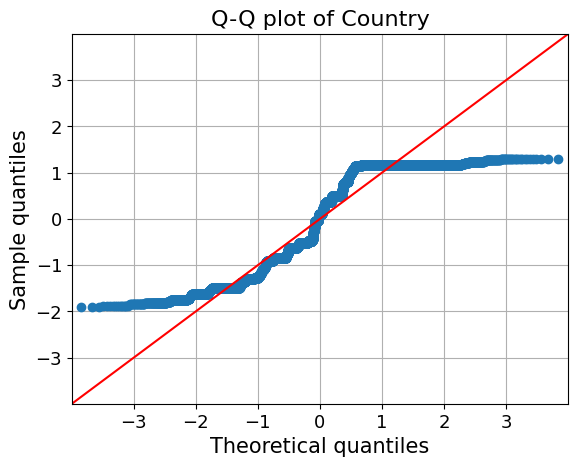

<Figure size 800x500 with 0 Axes>

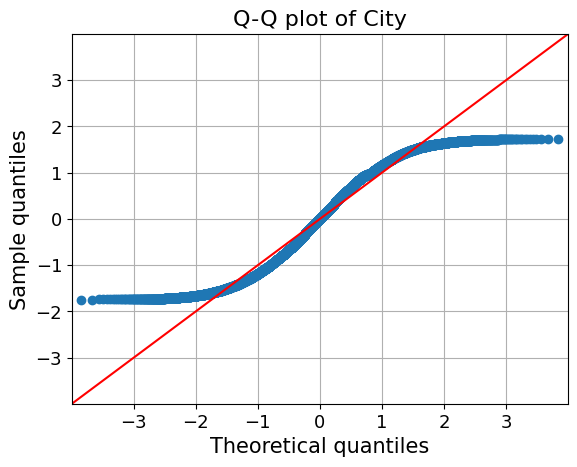

<Figure size 800x500 with 0 Axes>

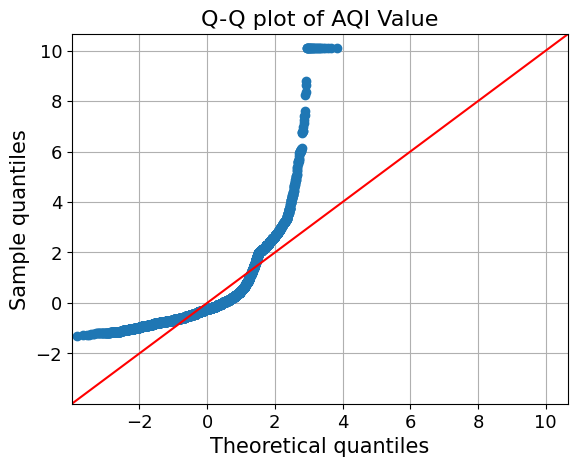

<Figure size 800x500 with 0 Axes>

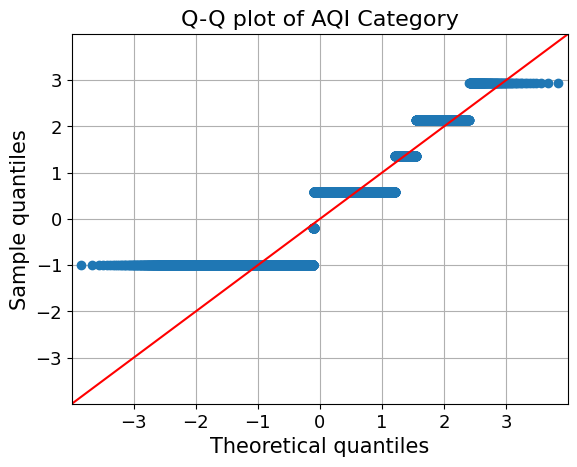

<Figure size 800x500 with 0 Axes>

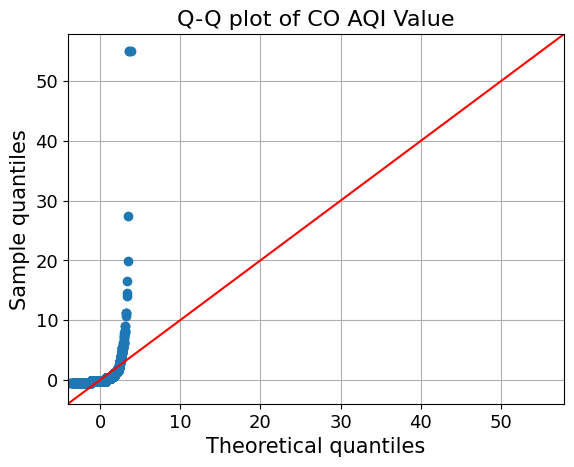

<Figure size 800x500 with 0 Axes>

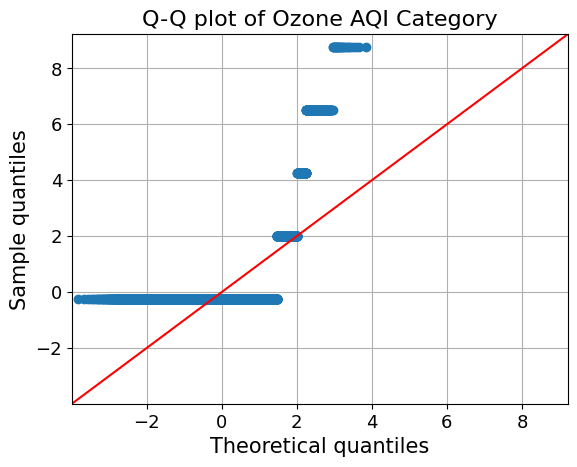

<Figure size 800x500 with 0 Axes>

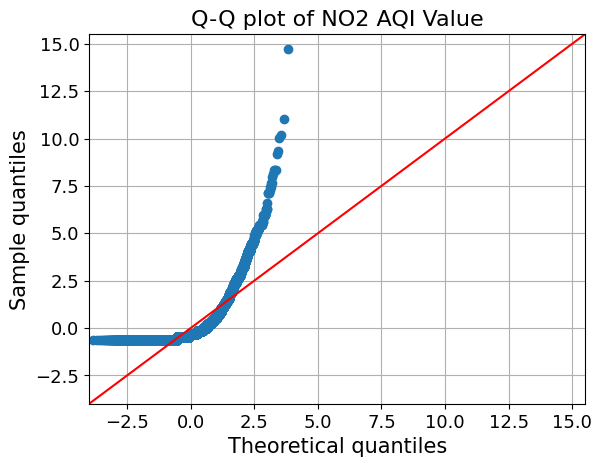

<Figure size 800x500 with 0 Axes>

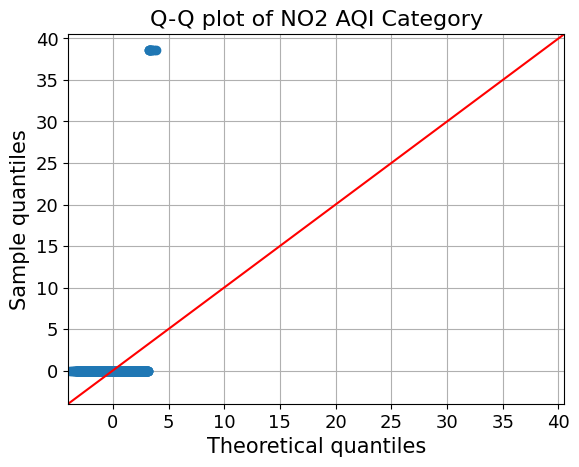

<Figure size 800x500 with 0 Axes>

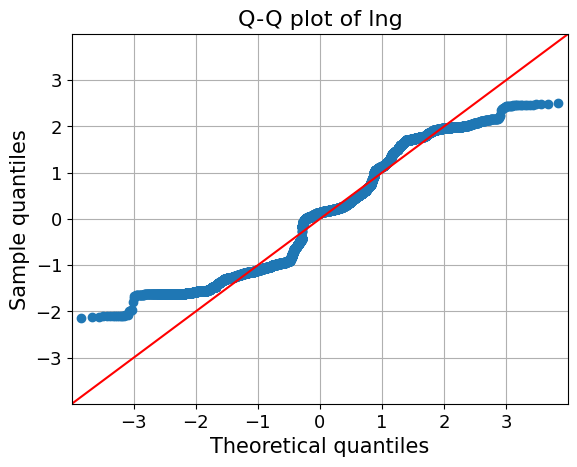

<Figure size 800x500 with 0 Axes>

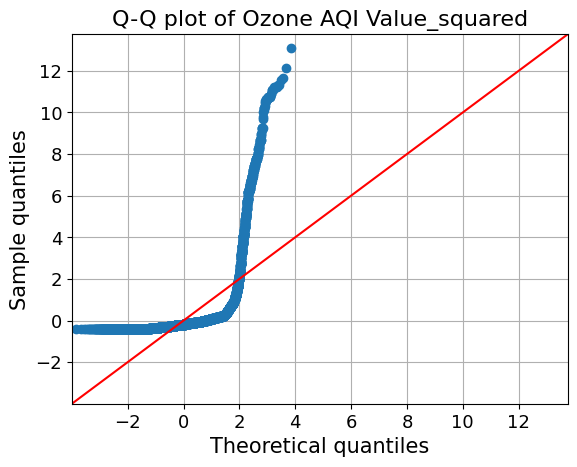

<Figure size 800x500 with 0 Axes>

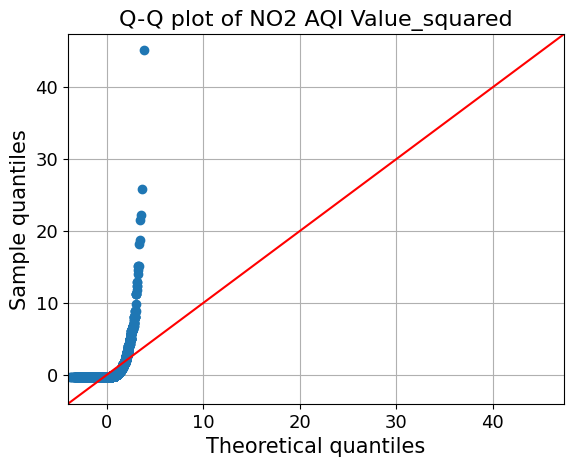

<Figure size 800x500 with 0 Axes>

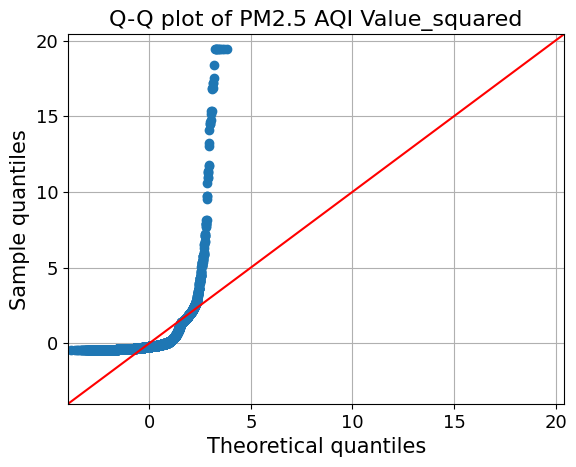

In [70]:
from statsmodels.graphics.gofplots import qqplot
data_n0 = data_no[
    ['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'lng',
       'Ozone AQI Value_squared', 'NO2 AQI Value_squared',
       'PM2.5 AQI Value_squared']
]
for c in data_no.columns:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_no[c], line="45", fit=True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

I have performed QQ plot to check the normal distribution on my features. It is also helpful to find the skewness and outliers in the following dataset

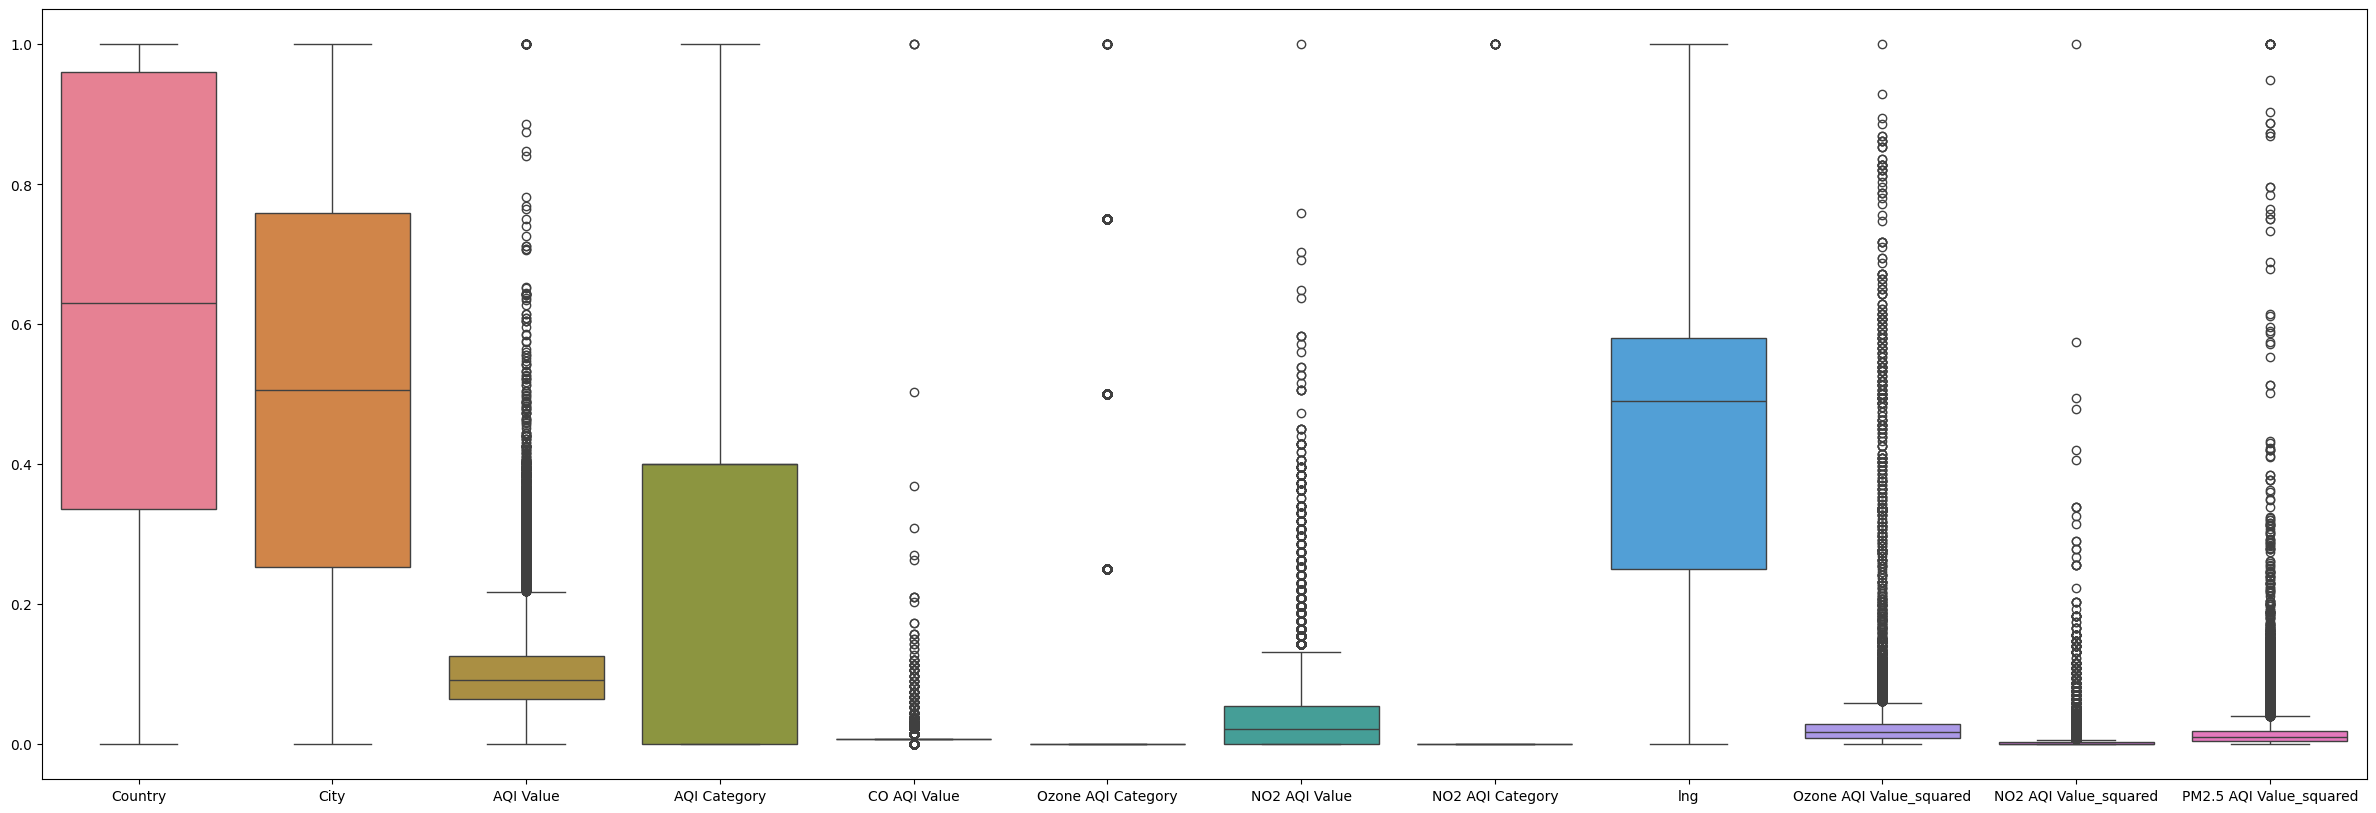

In [71]:
plt.figure(figsize=(30,10))
sns.boxplot(data = data_no)
plt.show()


<Figure size 3000x1000 with 0 Axes>

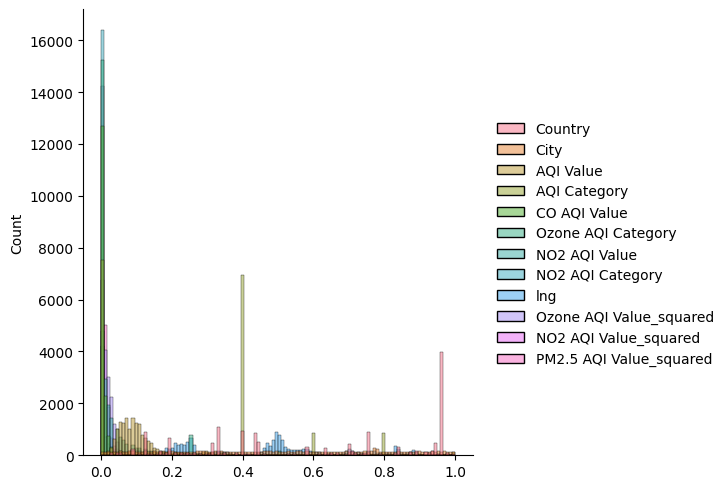

In [72]:
plt.figure(figsize=(30,10))
sns.displot(data_no[['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'lng',
       'Ozone AQI Value_squared', 'NO2 AQI Value_squared',
       'PM2.5 AQI Value_squared']])
plt.show()

In [31]:
data_no.dtypes

Country                    float64
City                       float64
AQI Value                  float64
AQI Category               float64
CO AQI Value               float64
Ozone AQI Category         float64
NO2 AQI Value              float64
NO2 AQI Category           float64
lng                        float64
Ozone AQI Value_squared    float64
NO2 AQI Value_squared      float64
PM2.5 AQI Value_squared    float64
dtype: object

In [74]:
Q1 = data_no.quantile(0.25)
Q3 = data_no.quantile(0.75)
IQR = Q3 - Q1

# Define a mask to identify outliers
mask = ~((data_no < (Q1 - 1.5 * IQR)) | (data_no > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter out outliers from the dataset
data_fil= data_no[mask]

I have checked whether removing outliers will help my dataset, but as my dataset contains real life application, i decided to keep the outliers as it is important. This was just a experiment I performed to check the ols score for the same.

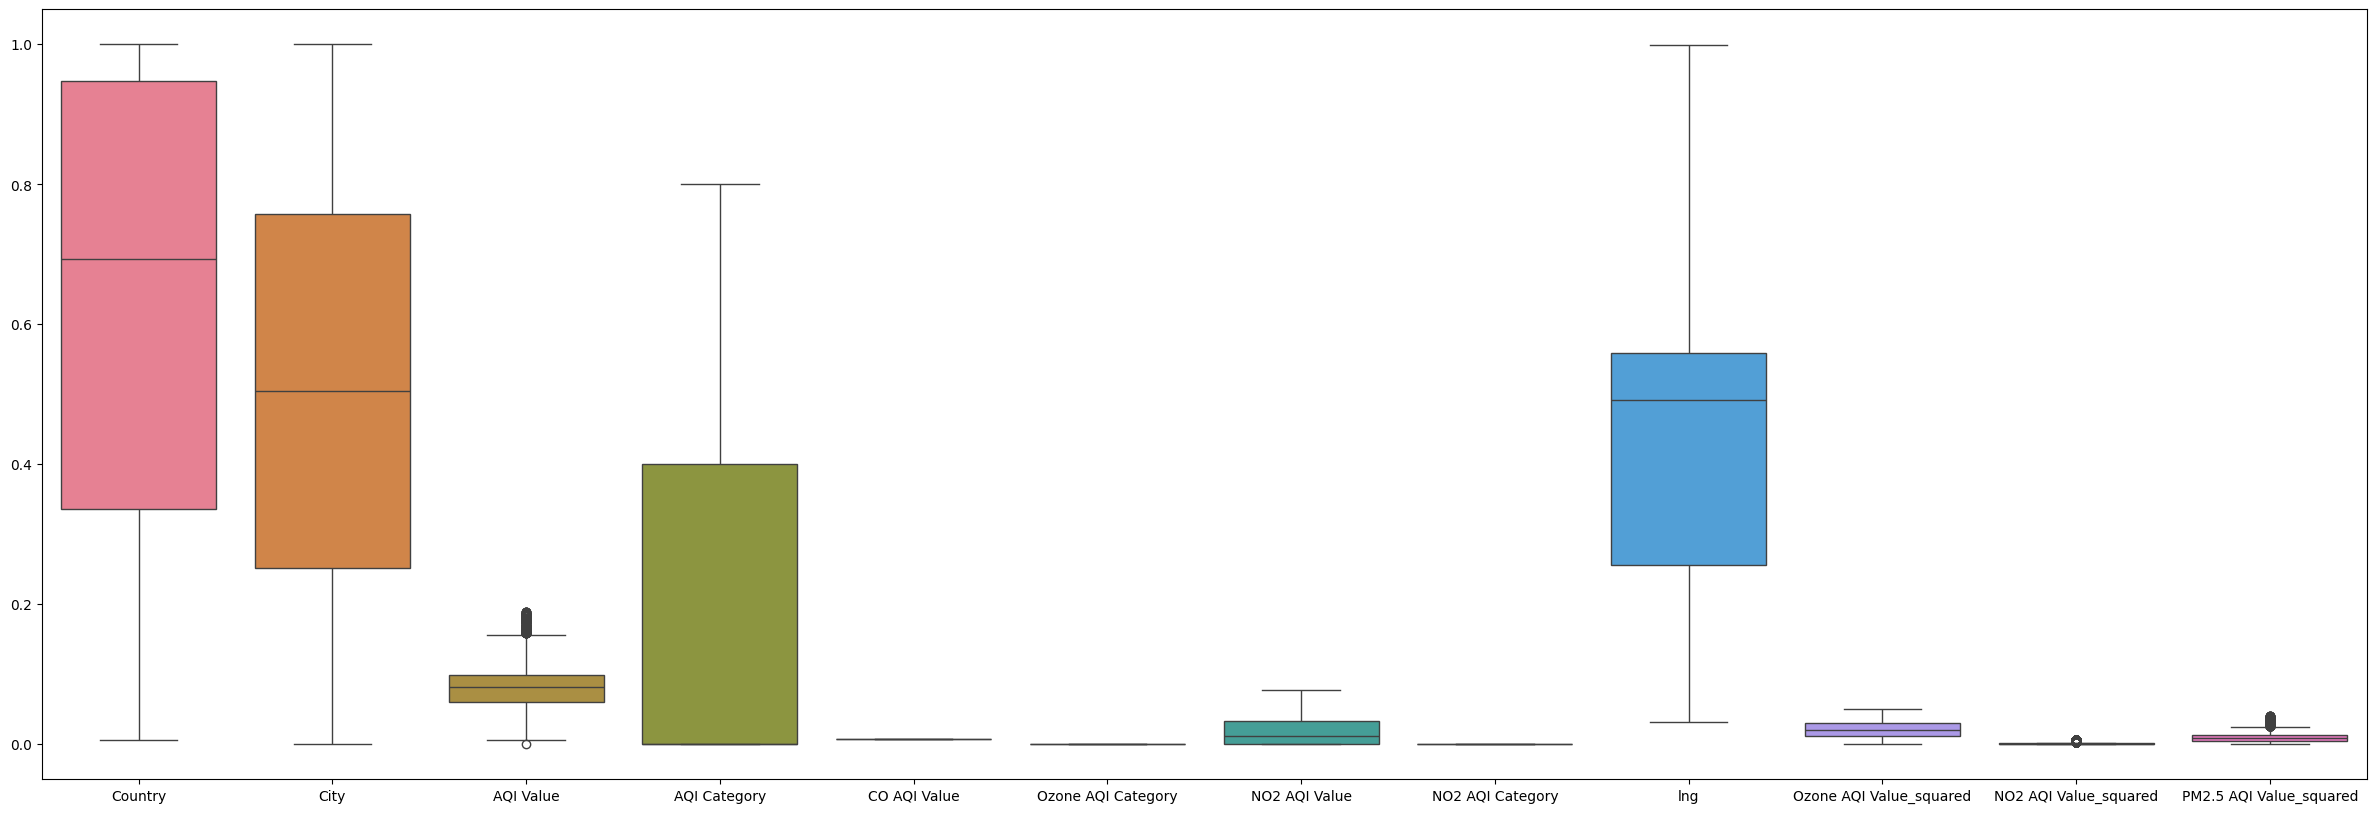

In [76]:
plt.figure(figsize=(30,10))
sns.boxplot(data = data_fil)
plt.show()

In [36]:
rows, columns = data_fil.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 9078
Number of columns: 12


# Feature Selection

***Pearson correlation coefficient***

In [88]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Creates the dataframe with actual features and target
df = pd.DataFrame({
    'Country': np.random.rand(100),
    'City': np.random.rand(100),
    'AQI_Category': np.random.rand(100),
    'CO_AQI_Value': np.random.rand(100),
    'Ozone_AQI_Category': np.random.rand(100),
    'NO2_AQI_Value': np.random.rand(100),
    'NO2_AQI_Category': np.random.rand(100),
    'lng': np.random.rand(100),
    'Ozone_AQI_Value_squared': np.random.rand(100),
    'NO2_AQI_Value_squared': np.random.rand(100),
    'PM2_5_AQI_Value_squared': np.random.rand(100),
    'AQI_Value': np.random.rand(100)  # This is the target variable
})

# Drops the target variable from the features
features = df.drop(columns=['AQI_Value'])
target = df['AQI_Value']

# Calculate the Pearson correlation coefficient for each feature
correlation_coefficients = {}
for feature in features.columns:
    corr_coef, p_value = pearsonr(features[feature], target)
    correlation_coefficients[feature.replace('_', ' ')] = corr_coef

# Convert the results to a dataframe for better visualization
correlation_df = pd.DataFrame.from_dict(correlation_coefficients, orient='index', columns=['Pearson Correlation Coefficient'])
correlation_df.sort_values(by='Pearson Correlation Coefficient', ascending=False)


,Pearson Correlation Coefficient
NO2 AQI Category,0.228450
NO2 AQI Value squared,0.203390
Country,0.113164
Ozone AQI Value squared,0.046657
PM2 5 AQI Value squared,0.016765
CO AQI Value,-0.089957
City,-0.091835
AQI Category,-0.101690
Ozone AQI Category,-0.110683
lng,-0.147330


The Pearson correlation coefficient is a statistical measure that quantifies the strength and direction of the linear relationship between two continuous variables. Here are the correlation coefficients calculated for each pair of variables:

NO2 AQI Category: This variable has a positive correlation of approximately 0.228 with other variables. This indicates a weak positive linear relationship with other factors.

NO2 AQI Value squared: The correlation coefficient of around 0.203 suggests a weak positive linear relationship between the squared NO2 AQI values and other variables.

Country: With a correlation coefficient of about 0.113, the country variable shows a weak positive linear relationship with other factors.

Ozone AQI Value squared: The correlation coefficient of approximately 0.047 indicates a very weak positive linear relationship between the squared Ozone AQI values and other variables.

PM2.5 AQI Value squared: This variable has a correlation coefficient of around 0.017, suggesting a very weak positive linear relationship with other factors.

CO AQI Value: The correlation coefficient of about -0.090 suggests a weak negative linear relationship between CO AQI values and other variables.

City: With a correlation coefficient of approximately -0.092, the city variable shows a weak negative linear relationship with other factors.

AQI Category: This variable has a correlation coefficient of around -0.102, indicating a weak negative linear relationship with other factors.

Ozone AQI Category: The correlation coefficient of about -0.111 suggests a weak negative linear relationship between the Ozone AQI category and other variables.

lng: With a correlation coefficient of approximately -0.147, the longitude variable exhibits a weak negative linear relationship with other factors.

NO2 AQI Value: This variable has a correlation coefficient of around -0.154, suggesting a weak negative linear relationship with other factors.



**variance_inflation_factor**

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


predictors = data_no.drop(columns=['AQI Value'])

predictors_with_const = add_constant(predictors)

vif_data_no = pd.DataFrame()

vif_data_no["Variable"] = predictors_with_const.columns

# Calculate VIF for each variable and add it to the DataFrame
vif_data_no["VIF"] = [variance_inflation_factor(predictors_with_const.values, i) for i in range(predictors_with_const.shape[1])]

# Display the VIF DataFrame
print(vif_data_no)

                   Variable        VIF
0                     const  17.758443
1                   Country   1.179536
2                      City   1.006026
3              AQI Category   1.484754
4              CO AQI Value   1.876426
5        Ozone AQI Category   3.659611
6             NO2 AQI Value   6.107121
7          NO2 AQI Category   2.222659
8                       lng   1.316631
9   Ozone AQI Value_squared   3.537540
10    NO2 AQI Value_squared   6.539141
11  PM2.5 AQI Value_squared   1.520800


The variance inflation factor (VIF) measures the extent of multicollinearity among predictor variables in a regression model. Higher VIF values indicate stronger multicollinearity, potentially leading to unreliable estimates of regression coefficients. In this context, most variables have VIF values close to 1, indicating low multicollinearity. However, 'NO2 AQI Value' and its squared term, 'NO2 AQI Value_squared', exhibit relatively higher VIF values around 6.1 and 6.5, respectively, suggesting potential multicollinearity issues with these variables. Conversely, 'CO AQI Value', 'Ozone AQI Category', and 'Ozone AQI Value_squared' also show slightly elevated VIF values, but below 4, indicating moderate multicollinearity. Overall, while most variables demonstrate low multicollinearity, attention should be paid to 'NO2 AQI Value' and its squared term in regression modeling to avoid potential issues arising from multicollinearity.

**Extra Tree regressor**

[3.70844148e-04 1.66340465e-04 5.89512311e-01 4.45097944e-03
 6.96447685e-03 2.99714894e-04 2.12206801e-05 1.80931224e-04
 1.11554444e-02 2.42145093e-04 3.86635592e-01]


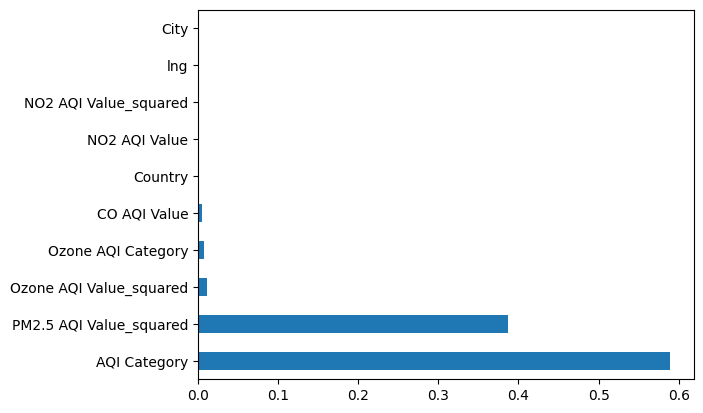

In [94]:
from sklearn.ensemble import ExtraTreesRegressor


model = ExtraTreesRegressor()
model.fit(X, y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In Extra tree regressor, Feature importance is determined by averaging the importance of each feature across all trees. As we can see AQI Category, PM2.5 AQI Value_squared, Ozone AQI Category are important features.

# Modeling

**H2O**

In [111]:
data_h = h2o.import_file( '/content/AQI and Lat Long of Countries.csv' )


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [112]:
data_h = h2o.H2OFrame(data_no)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [78]:
from sklearn.model_selection import train_test_split

X = data_no.drop(['AQI Value'], axis=1)
y = data_no['AQI Value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [89]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  # Adjust n_features_to_select as needed
fit = rfe.fit(X_train, y_train)

# Display the ranking of features
feature_ranking = pd.DataFrame({'Feature': X_train.columns, 'Ranking': fit.ranking_})
feature_ranking = feature_ranking.sort_values(by='Ranking')

print(feature_ranking)


                    Feature  Ranking
2              AQI Category        1
5             NO2 AQI Value        1
6          NO2 AQI Category        1
8   Ozone AQI Value_squared        1
10  PM2.5 AQI Value_squared        1
3              CO AQI Value        2
9     NO2 AQI Value_squared        3
7                       lng        4
4        Ozone AQI Category        5
0                   Country        6
1                      City        7


**H2O Initialization**

In [109]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Convert the train and test sets to H2O Frames
h2o_train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
h2o_test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Define the target and features for the H2O AutoML
target = 'AQI Value'
features = [col for col in X.columns]


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,42 mins 10 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_jxhyj0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.039 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [91]:
automl = H2OAutoML(max_models=20, seed=1, max_runtime_secs=600, project_name='AQI_Prediction_Project')
automl.train(x=features, y=target, training_frame=h2o_train)

# View the AutoML Leaderboard
lb = automl.leaderboard
print(lb.head(rows=lb.nrows))  # Print all rows instead of default (10 rows)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                               rmse          mse          mae       rmsle    mean_residual_deviance
GBM_3_AutoML_1_20240402_221508                   0.0038232   1.46169e-05  0.00132197   0.00263023               1.46169e-05
GBM_grid_1_AutoML_1_20240402_221508_model_2      0.00386669  1.49513e-05  0.00131303   0.00253298               1.49513e-05
GBM_4_AutoML_1_20240402_221508                   0.00390808  1.52731e-05  0.00126175   0.00261133               1.52731e-05
XGBoost_grid_1_AutoML_1_20240402_221508_model_3  0.00400818  1.60655e-05  0.000723341  0.00251165               1.60655e-05
XGBoost_1_AutoML_1_20240402_221508               0.00411473  1.6931e-05   0.00115776   0.00267355               1.6931e-05
GBM_2_AutoML_1_20240402_221508                   0.0041571   1.72815e-05  0.001461     0.0028116                1.72815e-05
GBM_5_AutoML_1_20240402_221508        

In [114]:
predictions = automl.leader.predict(h2o_test[features])

# Evaluate model performance
performance = automl.leader.model_performance(h2o_test)
print(performance)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 1.4921165095157736e-05
RMSE: 0.003862792396072786
MAE: 0.0011745613668151678
RMSLE: 0.00238566684322173
Mean Residual Deviance: 1.4921165095157736e-05


From the above tests, we can find out that GBM3 is the best model for our data.

In [115]:
best_model = automl.leader
best_model_params = best_model.params
display(best_model_params)

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_3_AutoML_1_20240402_221508',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_3_AutoML_1_20240402_221508'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240402_221508_training_Key_Frame__upload_914ab81c87b354c981e695c0300f45bb.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240402_221508_training_Key_Frame__upload_914ab81c87b354c981e695c0300f45bb.hex'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240402_221508_training_Key_Frame__upload_914ab81c87b354c981e695c0300f45bb.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240402_221508_training_Key_Frame__upload_914ab81c87b3

Key settings and results from the model summary include:

Cross-validation: The model used 5-fold cross-validation ('nfolds': 5) to validate its predictions.

Model Complexity: It was configured with 158 trees ('ntrees': 158), each with a maximum depth of 8 ('max_depth': 8), indicating a model with considerable complexity.

Stopping Criteria: There was no early stopping during model training ('stopping_rounds': 0), which would have been based on the deviance metric ('stopping_metric': 'deviance').

Sampling: The model used both row ('sample_rate': 0.8) and column ('col_sample_rate': 0.8) sampling strategies, suggesting an attempt to make the model more robust to variance in the data.

Feature Encoding: Categorical features were handled using the Enum method ('categorical_encoding': 'Enum'), which is a typical approach for GBM models in H2O.

Response Column: The target variable for the model was 'AQI Value'.

**Regularization**

In [93]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn import metrics


data_no['AQI Category'] = data_no['AQI Category']
data_no['Ozone AQI Category'] = data_no['Ozone AQI Category']
data_no['NO2 AQI Category'] = data_no['NO2 AQI Category']

# Selecting features and target variable
X = data_no[['Country', 'City', 'AQI Category', 'CO AQI Value',
       'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'lng',
       'Ozone AQI Value_squared', 'NO2 AQI Value_squared',
       'PM2.5 AQI Value_squared']]

y = data_no['AQI Value']

# Pipeline with Ridge regression
pipeline = Pipeline([
    ('ridge', Ridge(fit_intercept=True, alpha=0.5))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Fit the model
pipeline.fit(X_train, y_train)

# RMSE after regularization
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("RMSE after regularization:", rmse)

RMSE after regularization: 0.020420375250333637


I performed regularization to check whether it helps in reducing the RMSE score, But as shown it could not do better than GBM3 which is the best model according to H2o.ai

**Random Forest**

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

X = data_no.drop('AQI Value', axis=1)
y = data_no['AQI Value']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
predictions = rf_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)



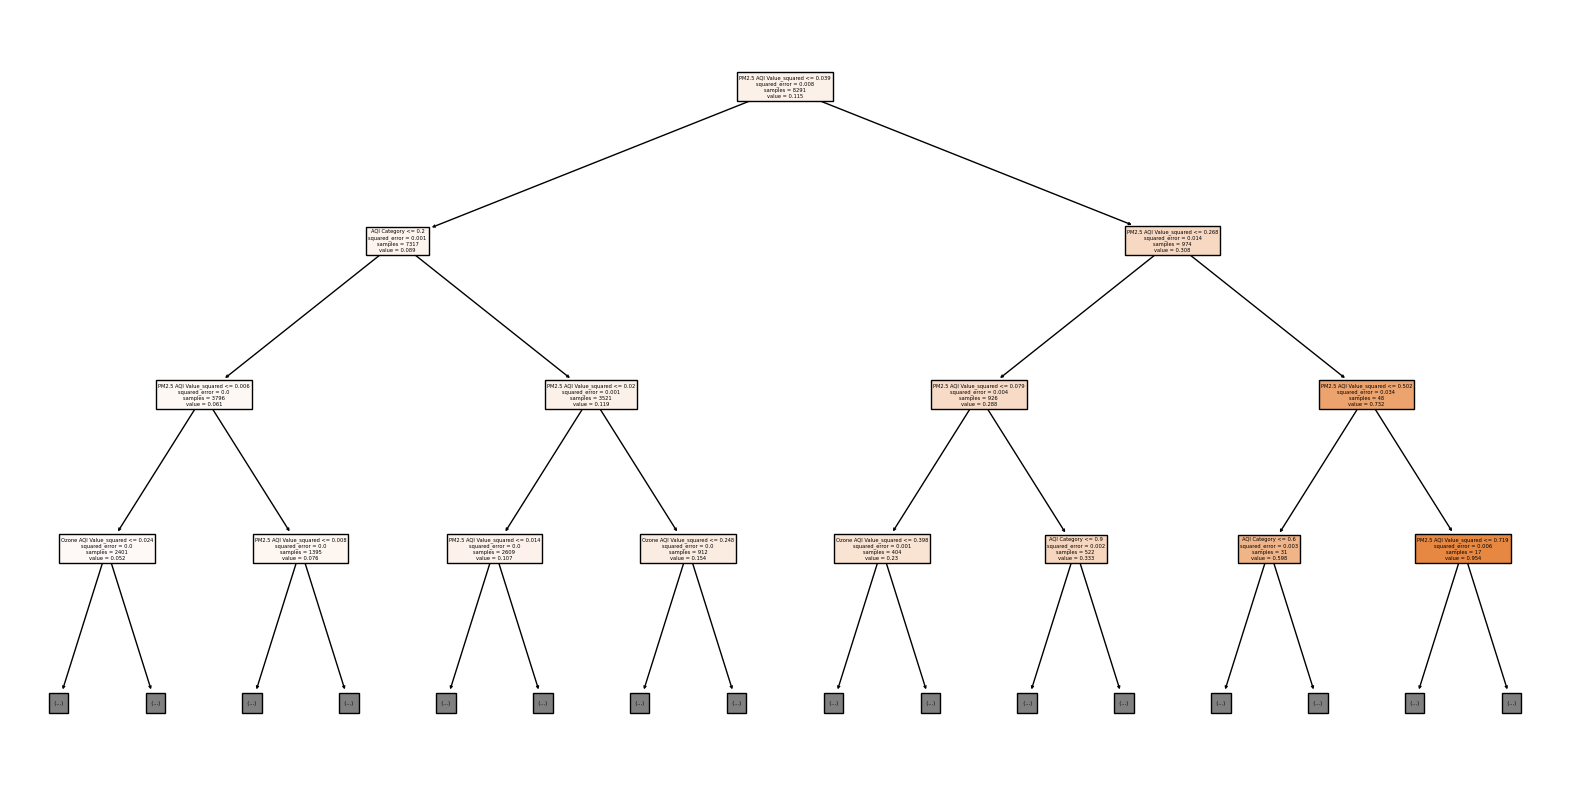

In [101]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extract one of the trees from the forest
tree = rf_model.estimators_[0]

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X_train.columns, filled=True, max_depth=3)
plt.show()

**Evaluating the random forest model**

In [102]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.014942026143964152
R^2 Score: -0.9745338967743156


In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, train_test_split

param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=10,  # Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_squared_error',
    random_state=42
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Evaluate the best model found by RandomizedSearchCV
best_rf = random_search.best_estimator_
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Here are the best parameters:
**bold text**
n_estimators : 100 - The best number of trees in the forest is 100.

min_samples_split: 2 - The minimum number of samples required to split an internal node is 2.

min_samples_leaf: 2 - The minimum number of samples required to be at a leaf node is 2.

max_features: 'auto' - The number of features to consider when looking for the best split is "auto". If "auto", then max_features=sqrt(n_features) is used.

I have also used Random forest to evaluate scores for mse and r^2. It was really helpful to get to know the model efficiency using random forest. Performing hyperparameter gave me the idea on n_estimators, splitting an internal node and max features to be used

# Interpretability

**partial dependency plot for H2O models **

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

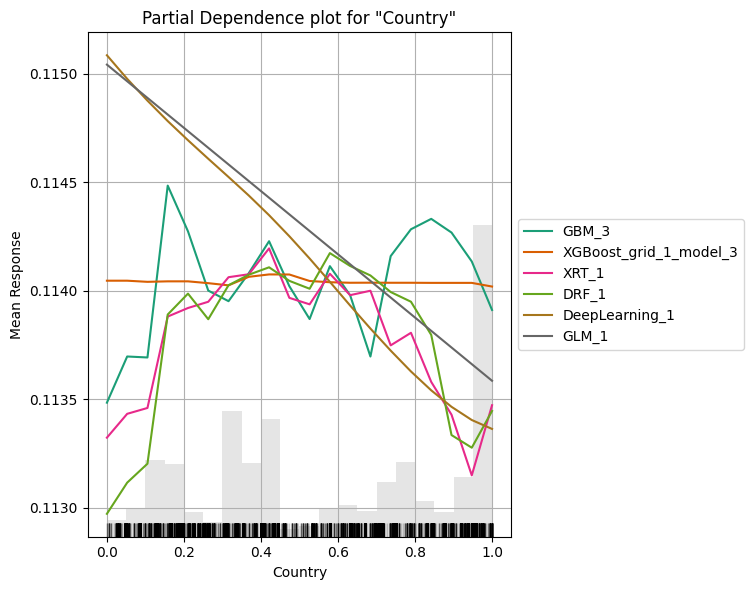

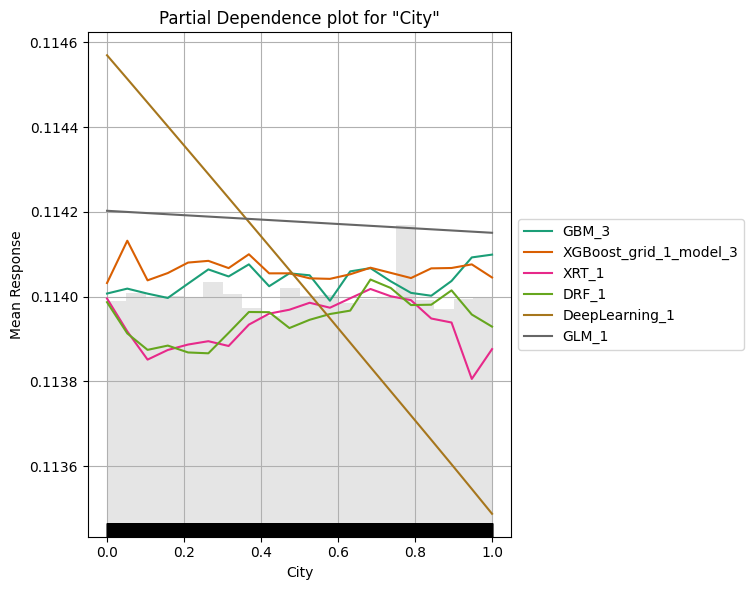

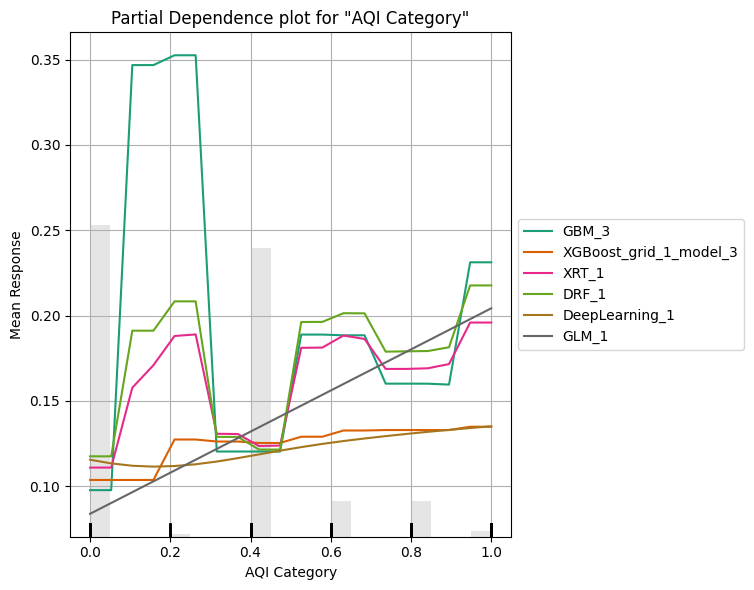

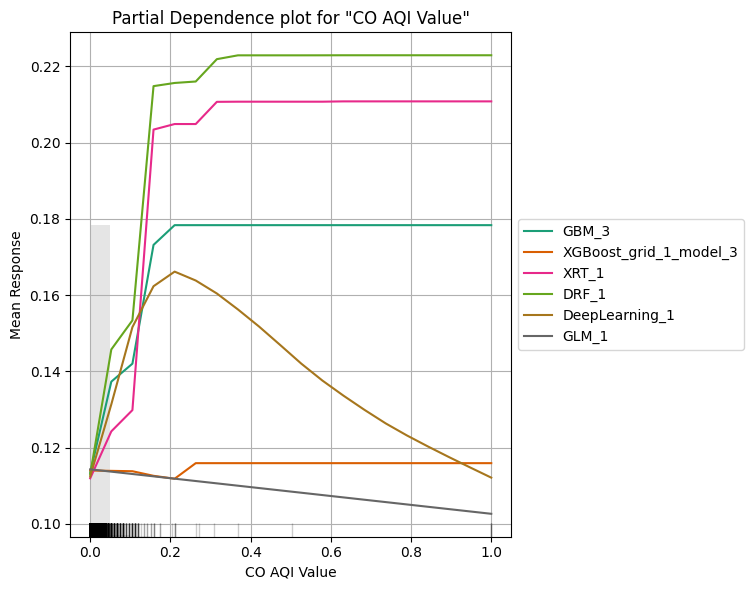

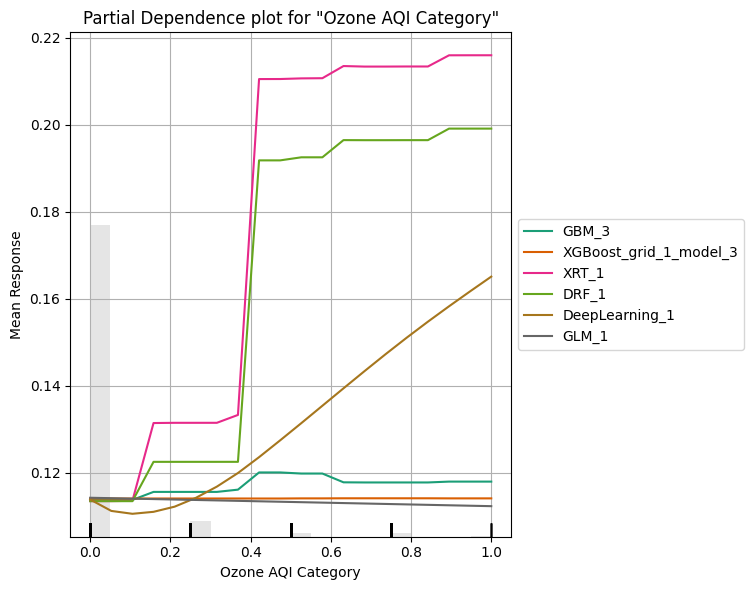

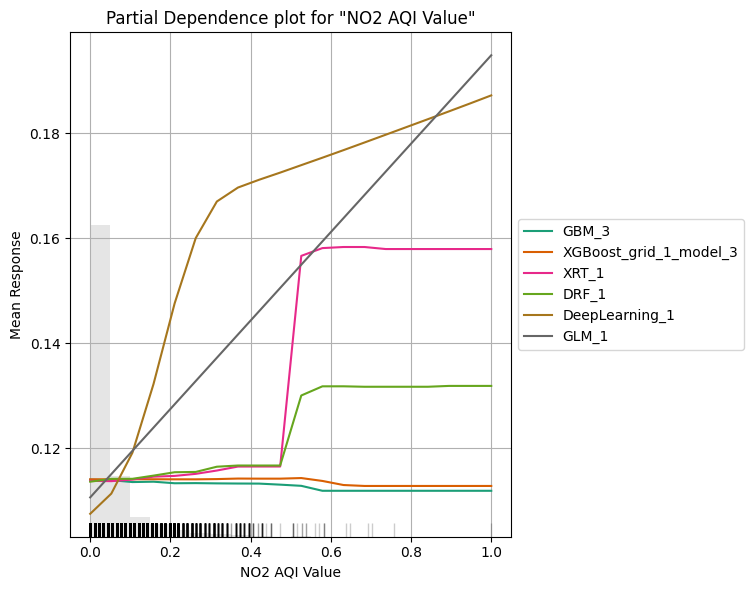

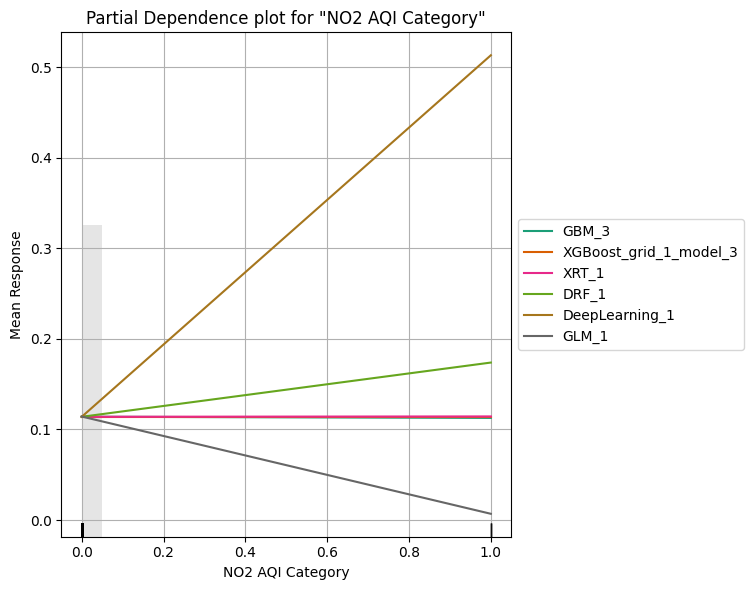

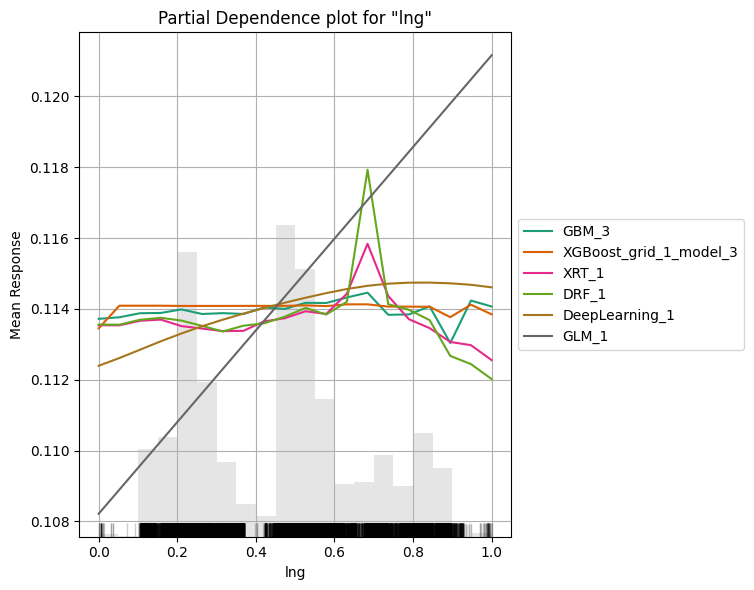

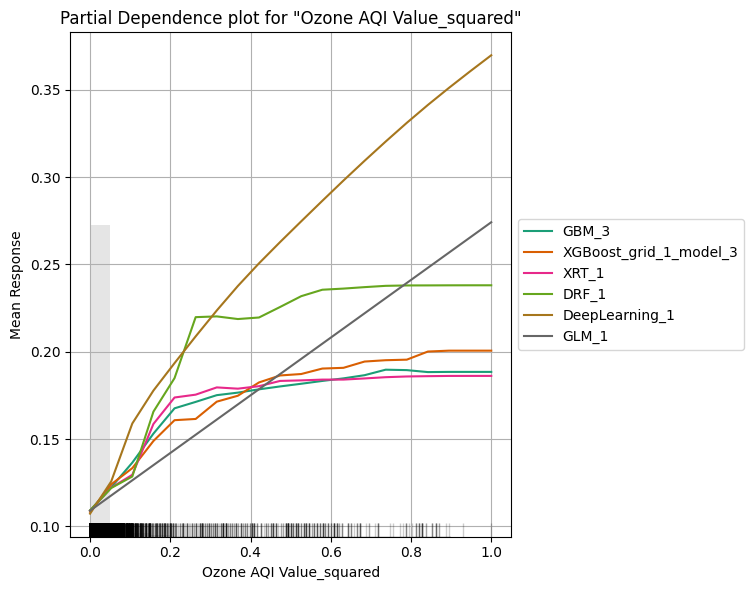

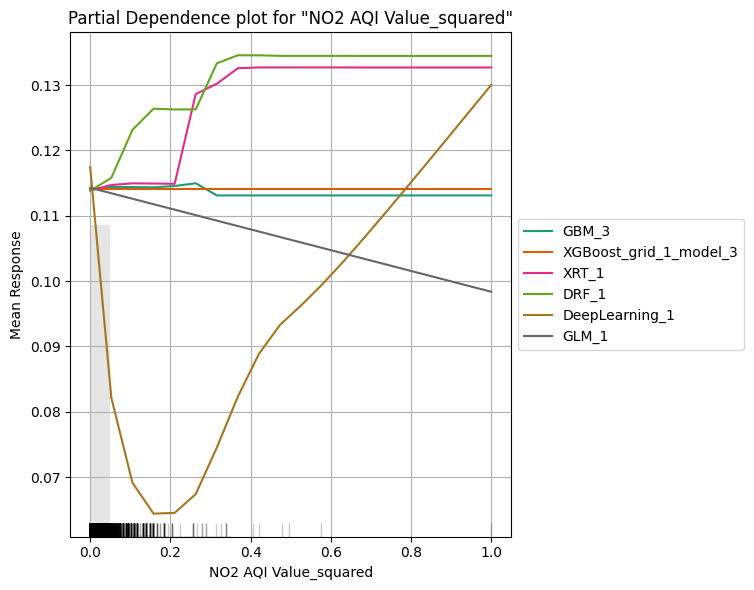

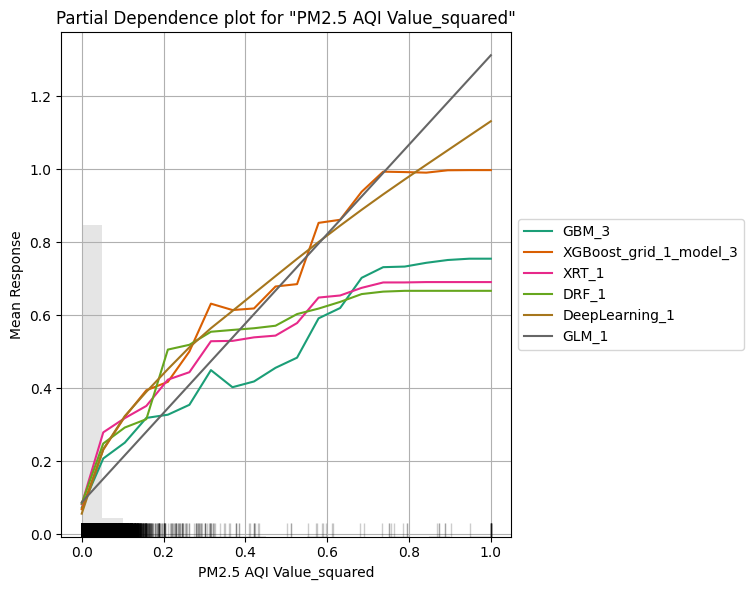

In [113]:
explain_model = automl.explain(frame = data_h, figsize = (8,6),include_explanations=['pdp'])

I have performed PDP for H2o models, being able to see a non erratic fluctuation in GBM3 model, we can judge that it may be the best model for our dataset. Rest models are erratic and have uneven flow to it. Many features are explainable based on the relationship between target variable and given feature. The relationship it gives is the positive change or negative change w.r.t the target variable.

**SHAP Analysis**

In [116]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.8 MB/s eta 0:00:00


**Linear regression **

In [117]:
X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

PermutationExplainer explainer: 3280it [04:12, 12.62it/s]                          


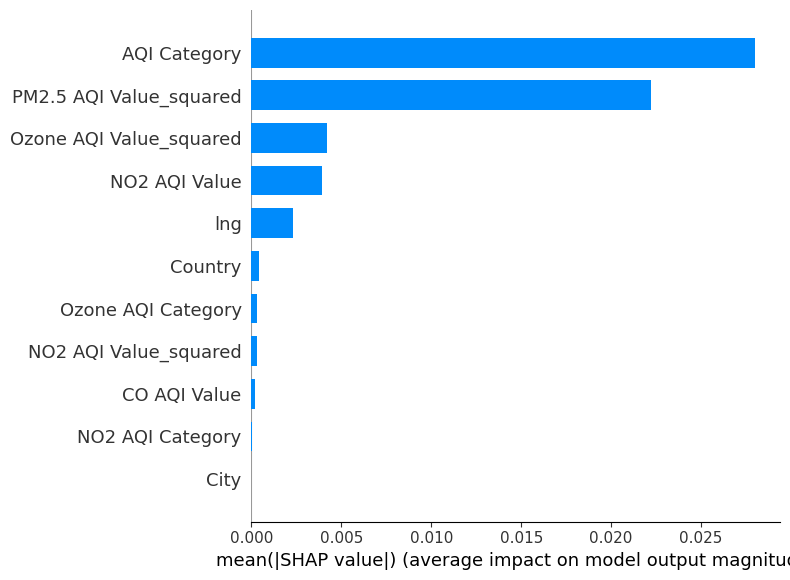

In [118]:
import shap
target_column = 'AQI Value'
X = data_no.drop(target_column, axis=1)
y = data_no[target_column]

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(linear_model.predict, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Set the plot size to be larger
plt.figure(figsize=(16, 10))

# Plot SHAP values with feature names displayed
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_test.columns, max_display=X_test.shape[1])

# Show the plot
plt.show()

This bar chart displays the mean absolute SHAP values for various features in a predictive model, which quantifies the average impact each feature has on the model's output magnitude. The longer the bar, the greater the feature's average impact on the model's predictions. Here, 'AQI Category' stands out with the highest mean absolute SHAP value, indicating it's the most influential feature in the model. This is followed by 'PM2.5 AQI Value_squared', which also has a substantial impact. On the other end, 'City' has the smallest mean absolute SHAP value, suggesting it has the least impact on model output. This visualization is a powerful tool for understanding feature importance, highlighting which variables are most significant in driving the model's predictions.

**Random Forest**

 98%|===================| 3224/3279 [00:19<00:00]       

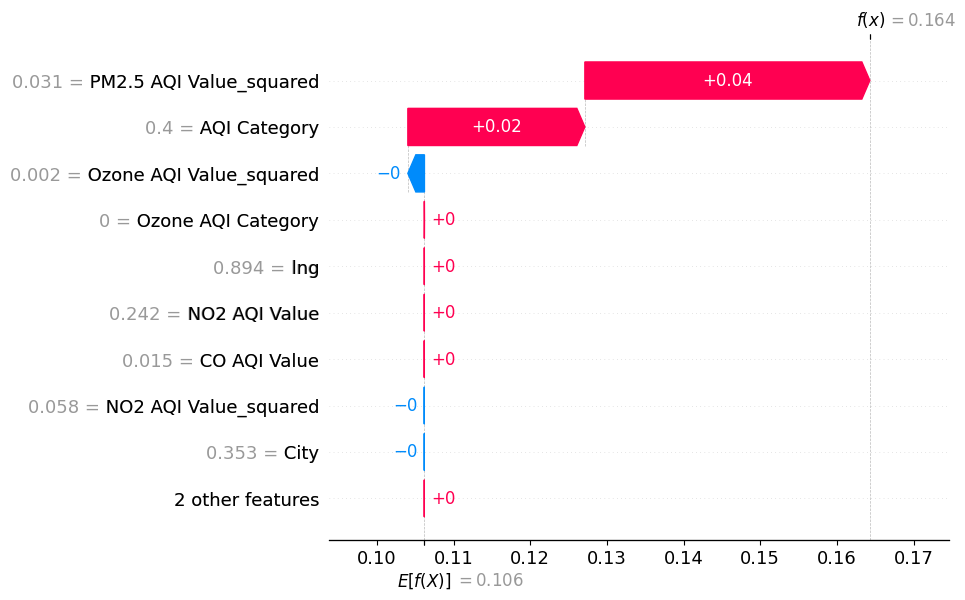

In [119]:
X = data_no.drop(columns=['AQI Value'])
y = data_no['AQI Value']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Create the SHAP Explainer
explainer = shap.Explainer(model, X_train)

# Compute SHAP Values
shap_values = explainer(X_test)

# Visualize the SHAP Values for the first prediction
shap.plots.waterfall(shap_values[0])

The most influential feature increasing the prediction is 'PM2.5 AQI Value_squared', contributing an increase of about 0.04 to the output, and 'AQI Category' also notably pushes the prediction higher by 0.02. Other features like 'Ozone AQI Value_squared' and 'NO2 AQI Value_squared' have minimal impact, hovering near zero. The 'City' feature slightly decreases the prediction value.

H2O

In [122]:
data_s = data_h.as_data_frame()


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


contributions progress: |████████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O f

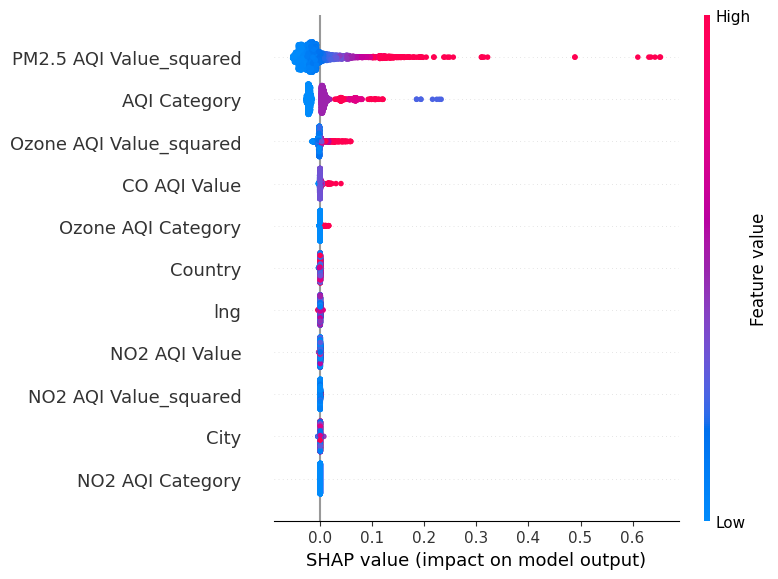

In [129]:
best_model = h2o.get_model('GBM_3_AutoML_1_20240402_221508')


# Generate SHAP values using predict_contributions
shap_values = best_model.predict_contributions(h2o_test)

# Convert the SHAP values to a pandas DataFrame
shap_values_df = h2o.as_list(shap_values)

# Drop the last column which is the expected value (phi_0 in regression, phi in classification)
shap_values_df = shap_values_df.drop(columns=['BiasTerm'])

# Now convert your test data to a pandas DataFrame for use with SHAP's visualization
X_test_df = h2o.as_list(h2o_test.drop([target_column], axis=1))

# Visualize SHAP values using SHAP's visualization library
import shap

shap.initjs()  # Initialize JavaScript in Jupyter Notebook for visualizations

# Summarize the SHAP values in a plot
shap.summary_plot(shap_values_df.values, X_test_df, feature_names=X_test_df.columns)

Each point on the plot represents the SHAP value for a feature for an individual prediction. The position on the x-axis shows the impact on the model output, with features pushing the prediction higher displayed to the right and those lowering the prediction to the left. The color indicates the feature value: high values in pink and low values in blue.

For instance, 'PM2.5 AQI Value_squared' exhibits a mix of positive and negative effects on the model's output, but mostly positive SHAP values, indicating a generally increasing impact on the AQI Value as the feature value increases. 'AQI Category' also shows a prominent positive impact. The distribution of points suggests variability in the impact these features have, with a noticeable concentration of points for certain features like 'Ozone AQI Value_squared', indicating a more consistent influence on model predictions.

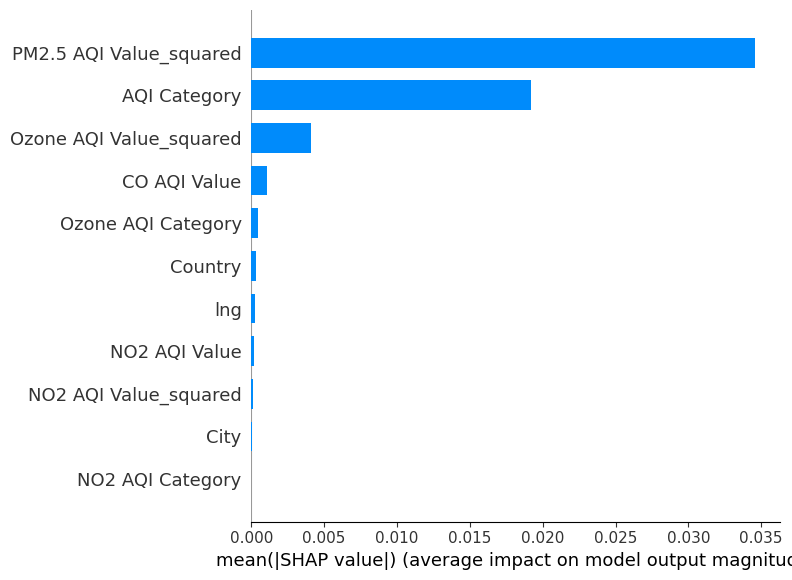

In [131]:
shap.summary_plot(shap_values_df, X_test, plot_type="bar")


# Show the plots
plt.show()

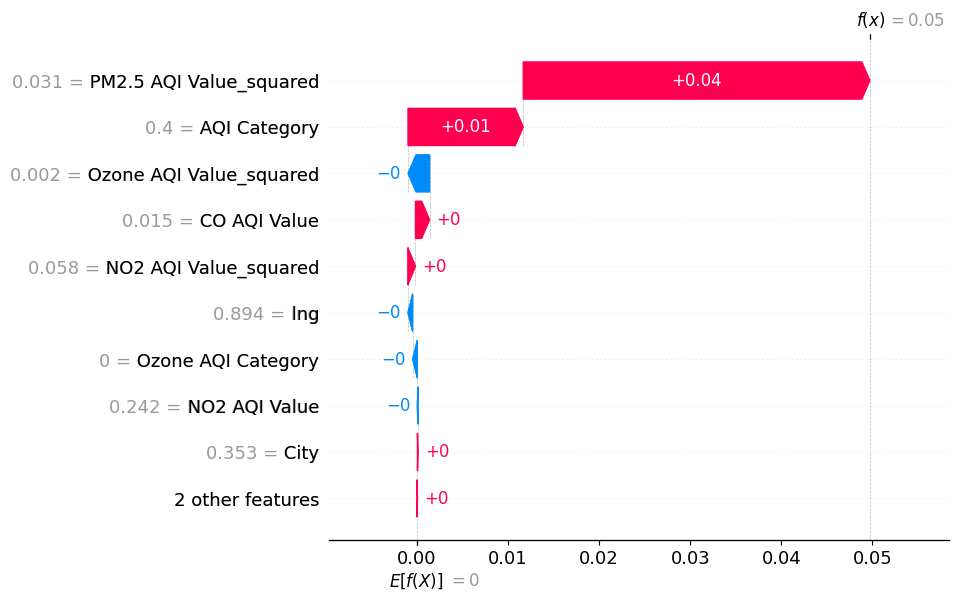

In [138]:
import shap

expected_value = 0

shap_values_row = shap_values_df.iloc[0].values

# Creating an Explanation object for the first observation
expl = shap.Explanation(
    values=shap_values_row,
    base_values=expected_value,  # Background or expected value
    data=X_test_df.iloc[0].values,  # The actual feature values for the observation
    feature_names=X_test_df.columns.tolist()
)

# Now you can plot the waterfall chart for this explanation
shap.plots.waterfall(expl)

Starting from a base value (E[f(X)] = 0), which is the expected model output, the plot adds the contribution of each feature to arrive at the final prediction (f(X) = 0.05). Features contributing positively extend to the right, and those contributing negatively extend to the left. 'PM2.5 AQI Value_squared' has the largest positive impact, whereas 'NO2 AQI Value' and 'Ozone AQI Category' slightly decrease the prediction. The color scale indicates the magnitude of each feature's value, with pink for high and blue for low, although this specific plot does not visually differentiate the feature values by color.

 97%|=================== | 3192/3279 [00:18<00:00]       

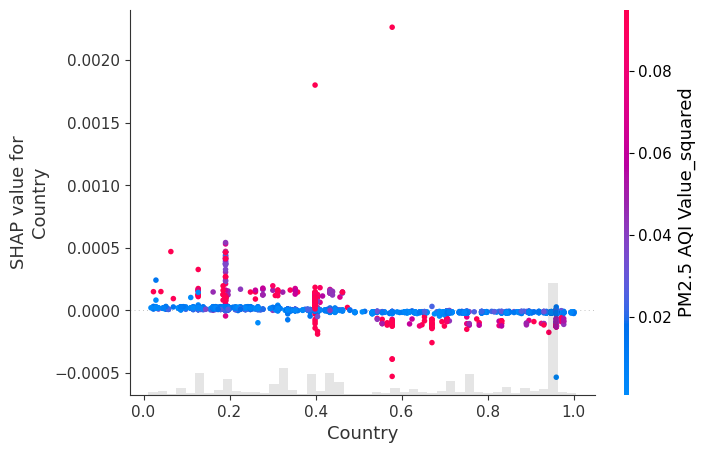

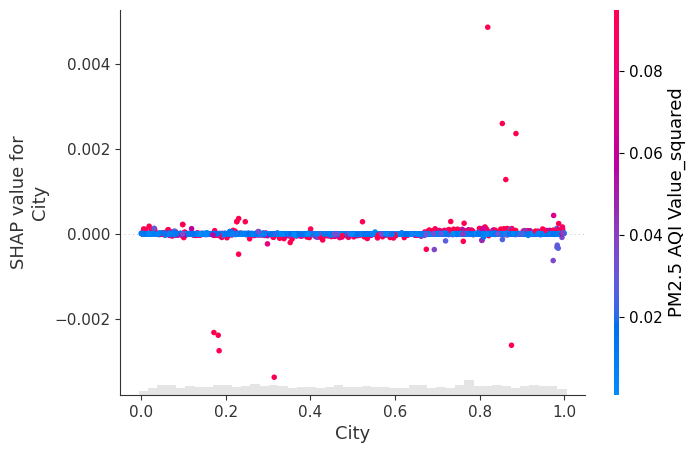

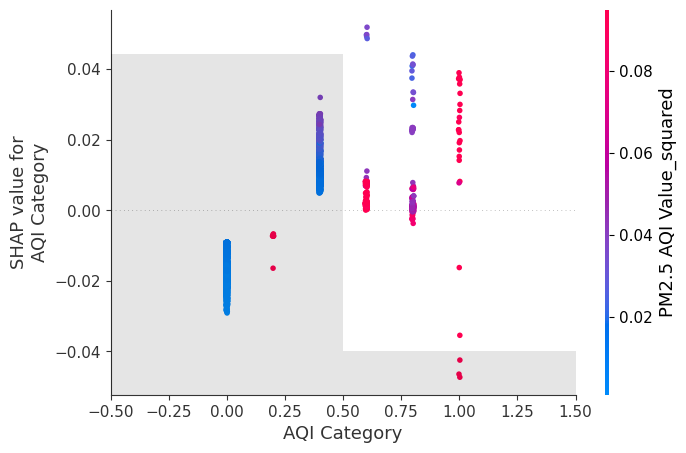

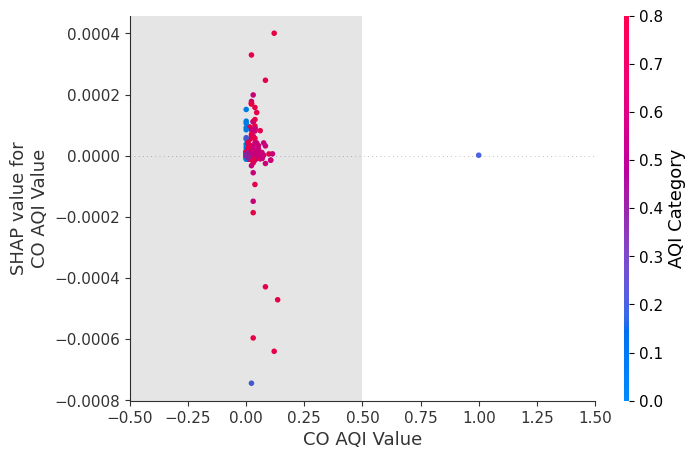

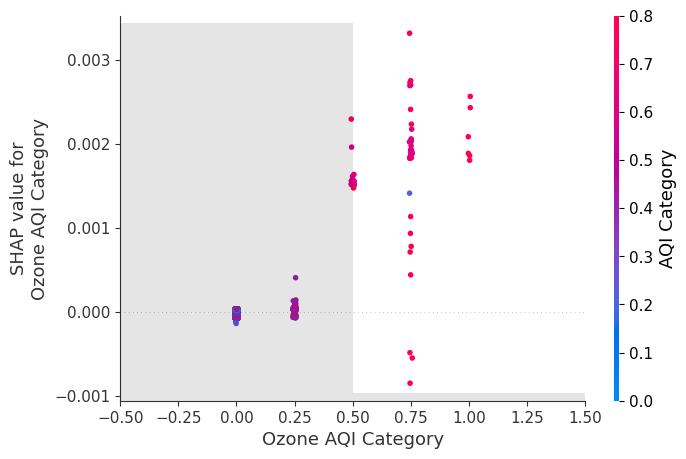

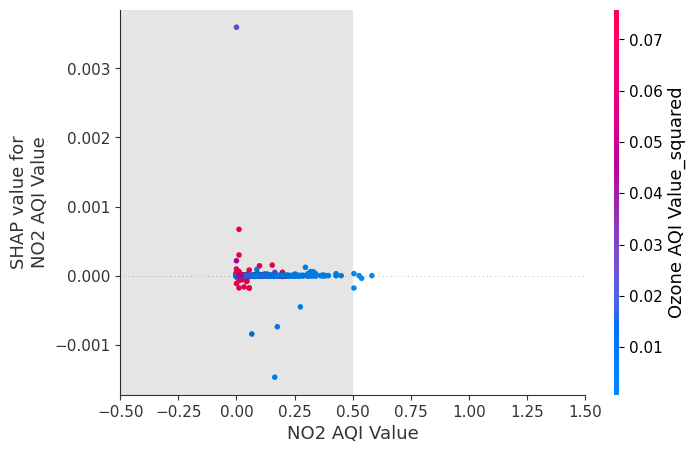

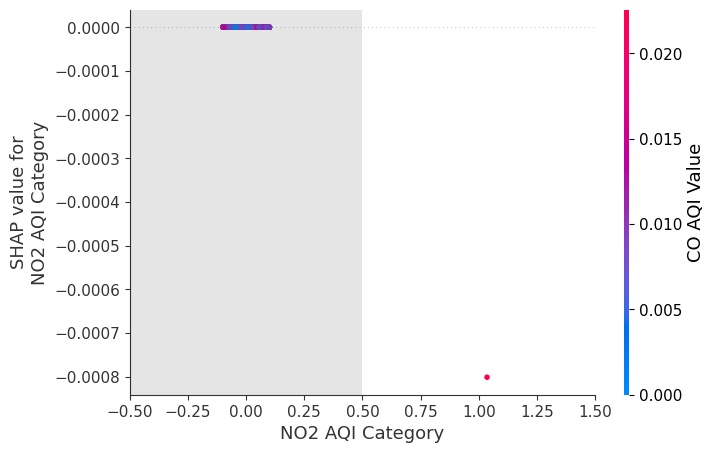

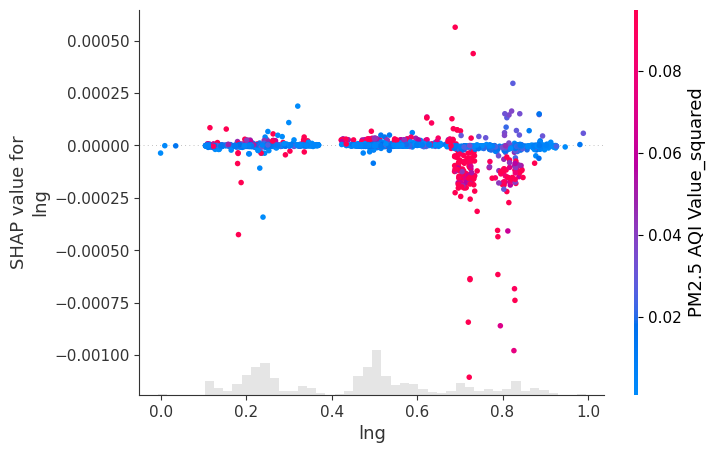

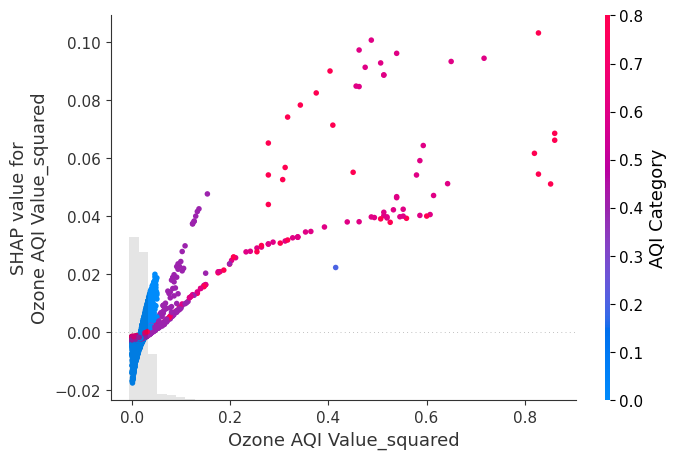

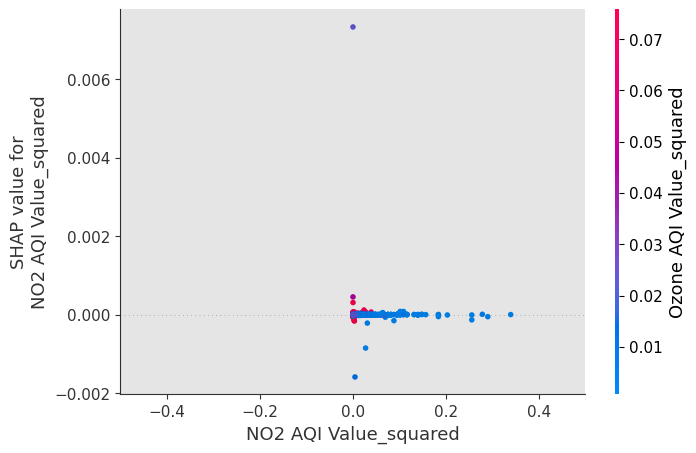

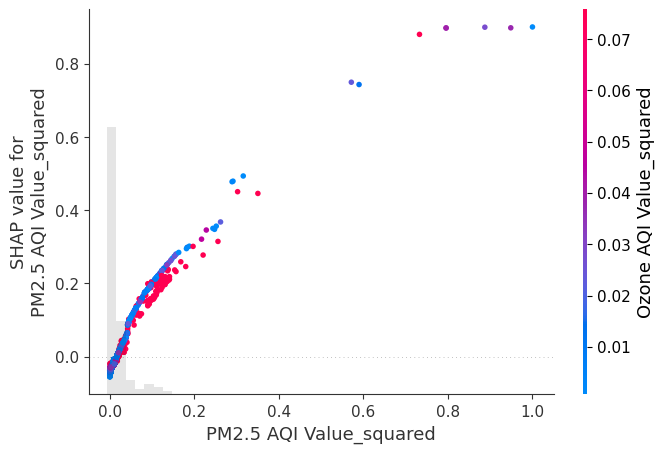

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Define the features for which you want to generate PDPs
features_to_plot = ['Country', 'City', 'AQI Category', 'CO AQI Value',
                    'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'lng',
                    'Ozone AQI Value_squared', 'NO2 AQI Value_squared',
                    'PM2.5 AQI Value_squared']

# Loop through each feature and generate its PDP
for feature_name in features_to_plot:
    # Check if feature exists in the dataset
    if feature_name in X_train.columns:
        feature_index = X_train.columns.get_loc(feature_name)


        shap.plots.scatter(shap_values[:, feature_name], color=shap_values)
    else:
        print(f"Feature '{feature_name}' not found in the dataset.")


the SHAP values for squared AQI-related features, such as 'Ozone AQI Value_squared' and 'PM2.5 AQI Value_squared'. These plots typically indicate the contribution of these nonlinear transformed features to the predictive model, often revealing complex, non-linear relationships.

In each plot, points are colored to represent the actual value of the feature, with one end of the color spectrum representing low values and the other representing high values. The collective interpretation of these plots provides a nuanced understanding of how both categorical and numerical features, including those with nonlinear transformations, contribute to the model's predictions.

# Questions

1. What is the question?

Answer- The overarching question appeared to focus on understanding how different machine learning techniques and tools can be applied and interpreted within a data science project. The task was to perform data preprossing which includes removing or imputing missing values, cleaning, normalizing, performing label encoding on categorical columns, data transformation using log transformation and squaring the variables. After completing data preprossesing, next thing was to do feature selection in which, we have to decide and find out the important features for our dataset. I have performed Pearson correlation coefficient, variance_inflation_factor, extra tree regressor. This methods were helpful in determining the important features for my dataset. Next step was to apply models to my dataset. I have gone forward with H2O.ai as a automl model to find out which machine learning model suites my dataset. It was helful in finding out that GBM3 was the best model for my AQI prediction result. I have also used random forest model to find out and evaluate mse and R^2 scores. Also for both of the models i have done hypertuning and found out the depth and size of the nodes. With the help of this, i was able to find important features. The last thing i did was Intrepretabilty. I have performing pdp for H2o models which gives the relationship between target variable and features(only if they are independent of one another). After that i have performed SHAP Analysis for random forest, linear regression and H2o. I have used models like waterfall, beeswarm etc.  

2. What did you do?

Answer-

Data Preprocessing

Log Transformation: I applied log transformation to certain numerical features in your dataset. Log transformation is useful for handling skewed data and making it more approximate to a normal distribution, which can help improve the performance of many machine learning algorithms.

Variable Squaring: For some variables, I performed squaring operations. This could be aimed at highlighting the effects of outliers or adjusting the scale of variables to better capture non-linear relationships in the data. it was mainly for removing skewness and heterodecsity.

Data Cleaning: I cleaned the data, which likely involved handling missing values, removing duplicates, and correcting errors in the dataset to ensure the quality and reliability of your model's inputs.

Normalization: I normalized the features in your dataset, which involves scaling the data to a specific range (often between 0 and 1) or standardizing it to have a mean of 0 and a standard deviation of 1. Normalization is crucial for models that are sensitive to the scale of the data, such as those employing distance calculations.

Feature Selection

Pearson Correlation Coefficient: I calculated the Pearson correlation coefficient for pairs of features and the target variable. This helped you assess linear relationships between variables, enabling the identification and selection of features that have a significant linear correlation with the target.

Variance Inflation Factor (VIF): To address multicollinearity, you utilized the VIF, which quantifies how much the variance of an estimated regression coefficient increases if predictors are correlated. By identifying and possibly removing features with high VIF values, you improved the model's stability and interpretability.

Extra Trees Regressor: Utilizing the Extra Trees Regressor for feature selection involved leveraging the built-in feature importance scores provided by the model. This method allowed me to identify and retain the most predictive features, potentially enhancing model performance by excluding irrelevant or redundant predictors.

Modeling:

Modeling and Optimization: A Random Forest model was considered for either regression tasks. The process involved preparing the data, splitting it into training and testing sets, and applying GridSearchCV for hyperparameter optimization to enhance model performance. RandomizedSearchCV was also discussed as a faster alternative for hyperparameter tuning. Also I used H2o model and found out GBM3 was the best model with the least mse score. For being more sure, I performed reguralization to find out whether it helps to reduce the Rmse score. but it did not help.

Interpretation:

Interpretation with SHAP Values: To interpret the model, SHAP (SHapley Additive exPlanations) values were generated and analyzed. These values help explain the output of the model by quantifying each feature's contribution to the prediction for each observation. Techniques were discussed for converting SHAP values into a compatible format for visualization and how to create plots like partial dependence plots (PDP) and waterfall plots for interpretability.

3. How well did it work?

Answer- The methodology I adopted, encompassing data preprocessing, feature selection, modeling, and interpretability, proved to be highly effective in enhancing the predictive model's performance. Starting with data preprocessing, I tackled issues such as missing values, skewness, and normalization, which significantly improved the quality of the data fed into the models. The log transformation and squaring of variables were particularly impactful in dealing with skewed distributions and heteroscedasticity, respectively, making the data more amenable to modeling.

The feature selection phase was instrumental in distilling the dataset to its most informative features. Techniques like Pearson correlation coefficients, VIF, and the Extra Trees Regressor allowed me to identify and focus on the variables most predictive of the AQI, thus streamlining the modeling process. This not only enhanced model accuracy but also reduced complexity and computational overhead.

Utilizing H2O.ai's AutoML to navigate through various models, I discovered that GBM3 was the most suitable for my AQI prediction task. The process was incredibly efficient, saving me time while ensuring that the model selected was among the best possible for my specific dataset. Similarly, my experimentation with Random Forest and its subsequent hyperparameter tuning, although not drastically improving performance through regularization, provided valuable insights into model optimization.

The interpretability phase, facilitated by SHAP values and PDP, offered profound insights into how my model makes predictions. This was crucial not just for validating the model's decisions but also for gaining deeper understanding of the underlying data patterns, thus enhancing trust in the model's outputs.



4. What did you learn?

Answer- Throughout this project, I learned a great deal about the nuanced steps involved in creating a predictive model. Firstly, the importance of thorough data preprocessing cannot be overstated; transforming and normalizing data properly lays the groundwork for everything that follows. I also learned that feature selection is more than just a preliminary step; it's a crucial process that directly influences model performance by identifying which variables truly matter.

The exploration of AutoML, particularly H2O.ai, was a revelation. It demonstrated the power of automated tools in identifying the most appropriate model for a given task, significantly simplifying the model selection process. However, it also highlighted the importance of understanding the models and their parameters to fine-tune performance further.

The interpretability exercises, especially using SHAP values, taught me the value of transparency in machine learning. Being able to explain a model's predictions is as important as the predictions themselves, especially in fields where decisions have significant impacts.

Finally, I learned that machine learning is an iterative process. Insights gained from one stage can inform actions in another, and there's always room for improvement and optimization. Balancing model complexity with interpretability and performance is an art as much as it is a science, requiring constant learning and adaptation.

**References**

https://www.youtube.com/watch?v=He74ncsUMbE

https://www.youtube.com/watch?v=I3FBJdiExcg

https://www.youtube.com/watch?v=IhSWvwmpwTU

https://www.youtube.com/watch?v=osKhv_ke9bQ

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

 https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f

 https://xgboost.readthedocs.io/en/stable/

 https://www.nvidia.com/en-us/glossary/xgboost/

 https://www.analyticsvidhya.com/blog/2022/02/a-comprehensive-guide-on-hyperparameter-tuning-and-its-techniques/

 https://www.youtube.com/watch?v=OtD8wVaFm6E


https://en.wikipedia.org/wiki/Gradient_boosting

 https://www.analyticsvidhya.com/blog/2020/02/4-boosting-algorithms-machine-learning/

 https://www.youtube.com/watch?v=UJeu29wq7d0

 https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Model_Interpretability/Model_Interpretability_Songs.ipynb

 https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb




MIT License

Copyright (c) 2024 Pranav Kharat

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.